In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from sklearn.model_selection import train_test_split
import warnings

In [2]:
df = pd.read_csv("intent.csv")
df.head()

,motivos,crec,cred,equ,inic,inv,mkt,no,renta,sueldo,temp
0,Crear un departamento de ventas e inversión a ...,0,0,0,0,0,1,0,0,0,0.0
1,establecerme en un local y agregar materia pri...,0,0,0,0,1,0,0,1,0,0.0
2,Compra de equipo e incrementar inventario,0,0,1,0,1,0,0,0,0,0.0
3,Invertir en crecimiento de flotilla de unidade...,0,0,1,0,0,0,0,0,0,0.0
4,Para comprar mercancía y comprar lonas nuevas,0,0,0,0,1,0,0,0,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6679 entries, 0 to 6678
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   motivos  6679 non-null   object 
 1   crec     6679 non-null   int64  
 2   cred     6679 non-null   int64  
 3   equ      6679 non-null   int64  
 4   inic     6679 non-null   int64  
 5   inv      6679 non-null   int64  
 6   mkt      6679 non-null   int64  
 7   no       6679 non-null   int64  
 8   renta    6679 non-null   int64  
 9   sueldo   6679 non-null   int64  
 10  temp     6673 non-null   float64
dtypes: float64(1), int64(9), object(1)
memory usage: 574.1+ KB


Variable `temp` should be int, but was cast as float. This possibly indicates data entry errors.

Print unique values (should be 0, 1 for all variables):

In [5]:
for i in df.columns[1:]:
    print('Unique values of column:', i)
    print(df[i].value_counts())
    print()

Unique values of column: crec
0    6079
1     600
Name: crec, dtype: int64

Unique values of column: cred
0    6250
1     429
Name: cred, dtype: int64

Unique values of column: equ
0    4699
1    1980
Name: equ, dtype: int64

Unique values of column: inic
0    6298
1     381
Name: inic, dtype: int64

Unique values of column: inv
0    4361
1    2318
Name: inv, dtype: int64

Unique values of column: mkt
0    6350
1     329
Name: mkt, dtype: int64

Unique values of column: no
0    6235
1     444
Name: no, dtype: int64

Unique values of column: renta
0    5909
1     770
Name: renta, dtype: int64

Unique values of column: sueldo
0    6464
1     215
Name: sueldo, dtype: int64

Unique values of column: temp
0.0    6484
1.0     189
Name: temp, dtype: int64



There are no decimal values on variable `temp`, so will convert to int:

In [17]:
# df = df.astype({"temp":'int'}) 
# df.info()

Dice que tiene NA o inf, pero en la distribución y en los unique values no aparecen (?)

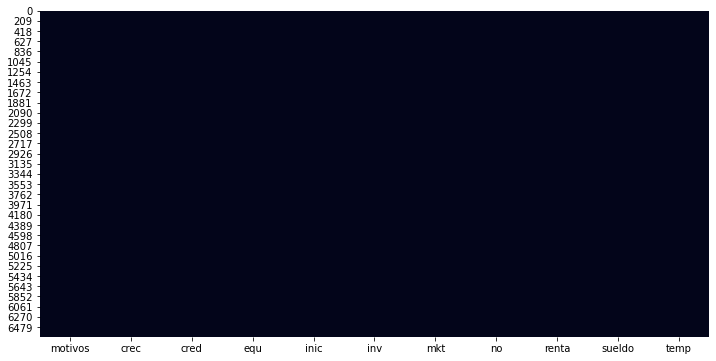

In [9]:
# Visualize missings pattern of the dataframe
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [12]:
# counting infinity in a particular column name
c = np.isinf(df['temp']).values.sum()
print("It contains " + str(c) + " infinite values")

It contains 0 infinite values


In [15]:
df['temp'].isna().sum()

6

In [16]:
df[df.isna().any(axis=1)]

,motivos,crec,cred,equ,inic,inv,mkt,no,renta,sueldo,temp
628,CAPITAL DE TRABAJO COMPRA DE MATERIA Y MANO DE...,0,0,0,1,0,0,0,1,0,NaN
710,Para incrementar ventas tener inventarios,0,0,0,1,0,0,0,0,0,NaN
1130,"Capital de trabajo\n,0,0,0,0,0,0,0,1,0,0\nRe i...",0,0,0,0,0,0,0,0,0,NaN
1437,Tengo que hacer renovación de Consepción,0,0,0,0,0,1,0,0,0,NaN
1699,PARA LA COMPRA DE ACTIVOS FIJOS PARA LA EMPRESA,0,0,0,1,0,0,0,0,0,NaN
2263,Compra de equipos de cómputo para lanzar proye...,0,1,0,0,0,0,0,0,0,NaN


We could drop the rows. But since most rows have other labels besides `temp`, it would be preferrable to keep them. So we will impute the NaNs with the median, which will be 0:

In [19]:
df['temp'].fillna(df['temp'].median(), inplace=True)
df.isna().sum()

motivos    0
crec       0
cred       0
equ        0
inic       0
inv        0
mkt        0
no         0
renta      0
sueldo     0
temp       0
dtype: int64

We want to see if the dataset is balanced:

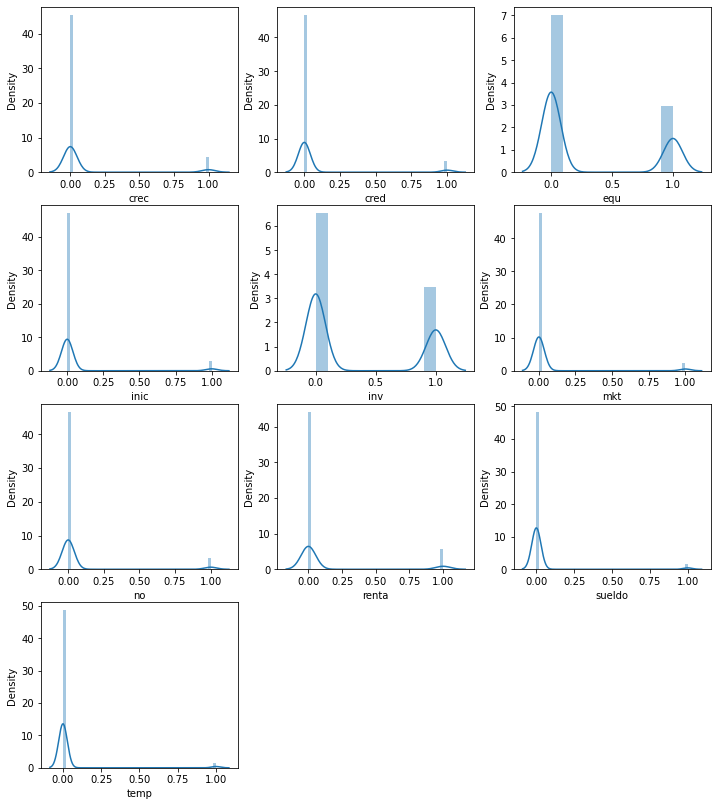

In [26]:
warnings.simplefilter(action='ignore', category=FutureWarning)

n_rows = 4
n_cols = 3

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12,14))

for i, column in enumerate(df.drop(['motivos'], axis=1).columns):
    sns.distplot(df.drop(['motivos'], axis=1)[column],ax=axes[i//n_cols,i%n_cols])
    
fig.delaxes(axes[3,2])
fig.delaxes(axes[3,1])

As expected, all classes are very imbalanced, with 1 being the minority class.